import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# 평균 검정(모집단 표준편차를 모르는 경우)

### 1. 
고객서비스센터의 고객만족도 평균은 76.7이다.  
개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다.  
개선활동이 만족도를 변화시켰는가? (a=0.05)
- 데이터 : 74.5 81.2 73.8 82.0 76.3 75.7 80.2 72.6 77.9 82.8

In [2]:
# df를 직접 입력
df=pd.DataFrame({'sample': [74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6, 77.9, 82.8]})

# 1-Sample t-test
t_result=stats.ttest_1samp(df, 76.7)

# 1-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 1-Sample t-test의 t값 p값 출력
print("1-Sample t-test")
print("t 통계랑 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t 통계랑 : [0.864]
p-value : [0.41]


In [43]:
# 정규성 검정
from scipy.stats import shapiro

df=pd.DataFrame({'sample': [74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6, 77.9, 82.8]})
shapiro(df)
t_result=stats.ttest_1samp(df, 76.7)
t_result

Ttest_1sampResult(statistic=array([0.86437028]), pvalue=array([0.40983028]))

> 결론 : 유의수준 5%에서 검정결과 P값이 0.41이므로 개선활동이 고객만족도 변화를 시켰다고 할 수 없다

### 2.
고객서비스센터의 고객만족도 평균은 78.0이다.  
개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다.  
개선활동이 만족도를 변화시켰는가? (a=0.05)  
- 데이터 : 85.0 79.0 79.1 79.9 81.6 78.6 85.4 83.4 78.1 79.2

In [3]:
# df를 직접 입력
df=pd.DataFrame({'sample': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})

# 1-Sample t-test
t_result=stats.ttest_1samp(df, 78.0)

# 1-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 1-Sample t-test의 t값 p값 출력
print("1-Sample t-test")
print("t 통계랑 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t 통계랑 : [3.379]
p-value : [0.008]


> 결론 : 유의수준 5%에서 검정결과 P값이 0.008이므로 개선활동이 고객만족도 변화를 시켰다고 할 수 있다

# 2 Sample t-test

### 3.
고객만족도 확인을 위하여 A고객과 B고객에 대해 Survey하여 다음의 데이터를 얻었다.  
A고객과 B고객의 모평균에 차이가 있다고 할 수 있는가? (유의수준 a=0.05)  
- 데이터(10점 척도, n=20)
    - A고객 : 6, 5, 5, 4, 6, 7, 6, 4, 5, 6, 4, 5, 5, 6, 4, 8, 6, 5, 6, 7
    - B고객 : 7, 5, 7, 8, 7, 8, 8, 5, 7, 6, 5, 5, 6, 6, 5, 7, 9, 7, 7, 8

In [4]:
# df1, df2를 직접 입력
df1=pd.DataFrame({'sample': [6, 5, 5, 4, 6, 7, 6, 4, 5, 6, 4, 5, 5, 6, 4, 8, 6, 5, 6, 7]})
df2=pd.DataFrame({'sample': [7, 5, 7, 8, 7, 8, 8, 5, 7, 6, 5, 5, 6, 6, 5, 7, 9, 7, 7, 8]})

# 2-Sample t-test
t_result=stats.ttest_ind(df1, df2)

# 2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-Sample t-test의 t값 p값 출력
print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:[-3.122]
p:[0.003]


> 결론 : 유의수준 5%에서 검정결과 P값이 0.003이므로 고객간에 고객만족도의 차이가 있다.

### 4.
제품을 A공급자와 B공급자로부터 제품을 받아 두께를 측정해서 다음의 데이터를 얻었다.  
공급자 간에 모평균에 차이가 있다고 할 수 있는가? (유의수준 a=0.05)

In [5]:
# df1, df2를 직접 입력
df1=pd.DataFrame({'sample': [1.883, 1.175, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344]})
df2=pd.DataFrame({'sample': [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

# 2-Sample t-test
t_result=stats.ttest_ind(df1, df2)

# 2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-Sample t-test의 t값 p값 출력
print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:[0.748]
p:[0.467]


> 결론 : 유의수준 5%에서 검정결과 P값이 0.467이므로 고객간에 고객만족도의 차이가 있다고 할 수 없다.

# Paired t-test

### 5.
회사원 10명에 대해 영어점수가 학원가기 전의 점수와 학원수강 후에 영어점수가 짝을 이루고 있다.  
회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라.

In [6]:
# df1, df2를 직접 입력
df1=pd.DataFrame({'before':[720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2=pd.DataFrame({'after':[810, 670, 790, 712, 810, 670, 790, 712, 790, 712]})

# Paired t-test
t_result=stats.ttest_rel(df1, df2)

# Paired t-test의 t값 p갑 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# Paired t-test의 t값 p값 출력
print("Paired t-test")
print("t:{}".format(t))
print("p:{}".format(p))

Paired t-test
t:[-5.324]
p:[0.]


> 결론 : 유의수준 5%에서 검정결과 P값이 0.000이므로 학원 수강 전후의 점수는 차이가 있다고 할 수 있다.

### 6.
회사원 10명에 대해 영어점수가 학원가기 전의 점수와 학원수강 후에 영어점수가 짝을 이루고 있다.  
회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라.

In [7]:
# df1, df2를 직접 입력
df1=pd.DataFrame({'before':[720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2=pd.DataFrame({'after':[710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

# Paired t-test
t_result=stats.ttest_rel(df1, df2)

# Paired t-test의 t값 p갑 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# Paired t-test의 t값 p값 출력
print("Paired t-test")
print("t:{}".format(t))
print("p:{}".format(p))

Paired t-test
t:[-2.266]
p:[0.05]


> 결론 : 유의수준 5%에서 검정결과 P값이 0.05이므로 학원 수강 전후의 점수는 차이가 있다고 할 수 없다.

# 1 Proportion test

### 7.
고급강 A제품을 가공하는 국내 고객사는 전체 중에 10% 정도가 된다.  
한 해 동안 A제품의 품질에 대해 노력을 하여 전체고객 중 100여 개의 업체를 표본으로하여 가공품질을 확인한 후 15개의 업체가 만족을 표현했다.   
과연 품질개선을 한 결과로 기존보다 전체 고객 중 사용비율의 차이가 있는 것인가? (유의수준(a) = 0.05)

In [44]:
# 변수 선연
count = 150
n_obs=1000
value=0.1

# Proportion test 실행
stat, pval = proportions_ztest(count, n_obs, value)

# Proportion test 결과 출력
print("1 Proportion test")
print("z:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(pval))

1 Proportion test
z:4.428
p:0.000


In [8]:
# 변수 선연
count = 15
n_obs=100
value=0.1

# Proportion test 실행
stat, pval = proportions_ztest(count, n_obs, value)

# Proportion test 결과 출력
print("1 Proportion test")
print("z:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(pval))

1 Proportion test
z:1.400
p:0.161


> 결론 : 결과적으로 고급강 A제품에 대해 품질개선 결과 기존대비 사용비율이 차이가 있다고 할 수 없다.

### 8.
동전이 정상적인가를 검정하기 위해 100번을 던져본 결과, 앞면이 40번 나왔으며 뒷면이 60번 나왔다.  
이 동전은 정상인가를 유의수준 a=0.05로써 검정하라.  
정상적인 동전을 던질 때, 앞면이 나올 확률을 50%이다.

In [9]:
# 변수 선연
count = 40
n_obs=100
value=0.5

# Proportion test 실행
stat, pval = proportions_ztest(count, n_obs, value)

# Proportion test 결과 출력
print("1 Proportion test")
print("z:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(pval))

1 Proportion test
z:-2.041
p:0.041


> 결론 : 결과적으로 이 동전은 정상이라고 판단할 수 있다.

# 2 Proportion test

### 9.
동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다.
두 공정의 불량률이 같다고 할 수 있는가?  
(유의수준(a)=0.05)
- 공장 1 : N1=1000, X1=4
- 공장 2 : N2=1200, X2=1

In [10]:
# 변수 선언
count = np.array([4, 1])
nobs  = np.array([1000, 1200])

# Proportion test 실행
stat, pval = proportions_ztest(count, nobs)

# Proportion test 결과 출력
print('2 Proportion test')
print('z:{0:0.3f}'.format(stat))
print('p:{0:0.3f}'.format(pval))

2 Proportion test
z:1.553
p:0.120


### 10.
동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다.  
두 공정의 불량률이 같다고 할 수 있는가?  
(유의수준(a)=0.05)
- 공장 A : N1=1200, X1=14
- 공장 B : N2=1200, X2=5

In [11]:
# 변수 선언
count = np.array([14, 5])
nobs  = np.array([1200, 1200])

# Proportion test 실행
stat, pval = proportions_ztest(count, nobs)

# Proportion test 결과 출력
print('2 Proportion test')
print('z:{0:0.3f}'.format(stat))
print('p:{0:0.3f}'.format(pval))

2 Proportion test
z:2.073
p:0.038


# 카이제곱 검정

### 11.
근무조별로 철강제품을 생산하고 있는데, 생산 제품의 규격이 3가지 종류가 있따.  
근무조별로 제품을 생산하는 부하는 차이가 있겠는가? (유의수준 0.05)

In [12]:
# df 생성
df=pd.DataFrame({'HSG':[270, 260, 236, 234], 'SS':[228, 285, 225, 262], 'SPA':[277, 284,231,208]})

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print("chi-square test")
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:13.366
p:0.038
degree pf freedom: 6
expected value: 
[[258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]]


> 결론 : 유의수준 5%에서 근무조별로 제품을 생산하는 부하 차이가 있다고 할 수 있다.

### 12.
노트북 컴퓨터의 6가지 제품(A, B, C, D, E, F)에 대하여 7가지 제품의 이미지를 중복 선택 할 수 있도록 32명의 소비자를 대상으로 설문 조사한 Table이다.  
각 제품에 대해 이미지에 대해 차이가 있겠는가? (유의수준 0.05)

In [13]:
# df 생성
df = pd.DataFrame({'A': [18,  1, 8, 7, 10, 9, 10], 'B': [8, 2, 14, 5, 5, 9, 4],
                   'C': [4, 1, 3, 4, 9, 5, 4],'D': [4, 1, 2, 3, 2, 7, 3],
                   'E': [3, 1, 3, 1, 1, 1, 1], 'F': [3, 25, 8, 10, 2, 1, 7]})

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print("chi-square test")
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:98.274
p:0.000
degree pf freedom: 30
expected value: 
[[11.004  8.528 10.454  8.253  7.978  8.803  7.978]
 [ 8.21   6.362  7.799  6.157  5.952  6.568  5.952]
 [ 5.24   4.061  4.978  3.93   3.799  4.192  3.799]
 [ 3.843  2.978  3.651  2.882  2.786  3.074  2.786]
 [ 1.921  1.489  1.825  1.441  1.393  1.537  1.393]
 [ 9.782  7.581  9.293  7.336  7.092  7.825  7.092]]


# One way ANOVA

### 13.
OO회사 마케팅실 그룹별 직원들의 TOEIC 성적에 차이가 있는지를 알고 싶다.  
A Group, B Group, C Group, 간의 토익 점수의 차이 여부를 검정하세요. (유의수주(a) = 0.05)

One-way
F 통계랑:4.263
p-value:0.025


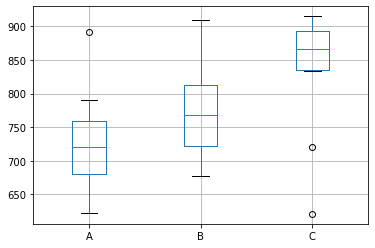

In [14]:
df = pd.DataFrame({'A': [892, 623, 721, 678, 723, 790, 720, 670, 690, 771],'B': [721, 821, 910, 678, 723, 790, 711, 790, 745, 891],
                   'C': [621, 915, 888, 721, 894, 834, 841, 912, 845, 889]})


# Group별 boxplot
df.boxplot(['A', 'B', 'C'])

# Anova 실행
f_result = stats.f_oneway(df['A'], df['B'], df['C'])

#ANOVA의 f값 p값 저장
f, p=f_result.statistic.round(3), f_result.pvalue.round(3)

#ANOVA의 f값 p값 출력
print("One-way")
print("F 통계랑:{}".format(f))
print("p-value:{}".format(p))

> 결론 : 유의수준 5%에서 검정결과 P값이 0.05이므로 그룹 간의 평균 차이가 있다고 할 수 있다.

### 14.
철강의 청정도를 높이기 위해 제강공정에서 2차 정련을 실시하는데,  
강종별과 type에 따라 2차정련 시간에 차이가 있는지 검정하라 (유의수준 0.05)
- (data set:ANOVA.csv)

In [15]:
df=pd.read_csv("../data/ANOVA.csv")
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


One-way 
F검정통계량 : 4.172 
p-value : 0.019 


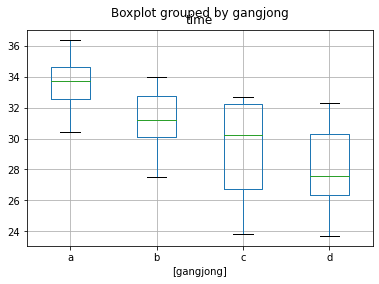

In [16]:
df.boxplot(by='gangjong')

group1 = df.loc[df.gangjong=='a']
group2 = df.loc[df.gangjong=='b']
group3 = df.loc[df.gangjong=='c']
group4 = df.loc[df.gangjong=='d']

f_result = stats.f_oneway(group1['time'],group2['time'], group3['time'], group4['time'])
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print( "One-way ")
print( "F검정통계량 : {} " .format(f))
print( "p-value : {} " .format(p))

> 결론 : 유의수준 5%에서 검정결과 P값이 0.019이므로 강종별 평균 차이가 있다고 할 수 있다.

One-way 
F검정통계량 : 9.654 
p-value : 0.005 


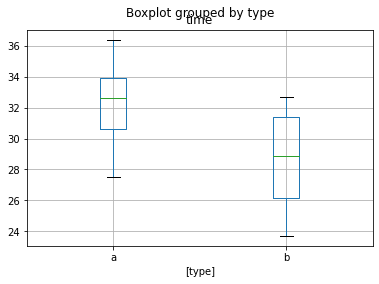

In [17]:
df.boxplot(by='type')

group1 = df.loc[df.type=='a']
group2 = df.loc[df.type=='b']


f_result = stats.f_oneway(group1['time'],group2['time'])
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print( "One-way ")
print( "F검정통계량 : {} " .format(f))
print( "p-value : {} " .format(p))

> 결론 : 유의수준 5%에서 검정결과 P값이 0.005이므로 타입별 평균 차이가 있다고 할 수 있다.

# 상관분석

### 15. 
부품수리시간과 부품 수간에 관계를 분석하기 위한 상관분석을 하세요.

In [18]:
#df 생성
df1 = [1, 2, 3, 4, 4, 5, 6, 6, 7, 8]
df2 = [23, 29, 49, 64, 74, 87, 96, 97, 109, 119]

# Correlation Analysis 실행
corr, pval = stats.pearsonr(df1, df2)

# Correlation, p-value 결과 출력
print("Correlation Analysis")
print('corr: {0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Analysis
corr: 0.989
p-value:0.000


> 결론 : 부품수리시간과 부품수간에 "매우 강한 상관성"이 있다고 할 수 있다.

### 16.
초코칩의 강도와 재료 반죽온도간에 관계를 분석하기 위한 상관분석을 하세요.

In [19]:
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 
       36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15,
       17, 14, 16, 20, 21]

# Correlation Analysis 실행
corr, pval = stats.pearsonr(df1, df2)

# Correlation, p-value 결과 출력
print("Correlation Analysis")
print('corr: {0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Analysis
corr: -0.723
p-value:0.000


> 결론 : 부품수리시간과 부품수간에 "음의 상관성"이 있다고 할 수 있다.

# 단순선형 회귀분석

### 17.
아래는 부품 수에 따른 수리 소요 시간 데이터이다.  
소요시간을 예측하기 위한 회귀분석을 실시하고 결과를 해석하시오.  
- 데이터 : 부품수리시간.CSV(변수:2개, 자료 수: 14개)

In [20]:
# 데이터 구성: Series, DataFrame
import numpy as np
# 행렬 연산
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y~X1+X2+...)
import statsmodels.formula.api as smf

# jupyter notebook 사용 시 그래프 자동 출력 옵션
%matplotlib inline

In [21]:
# 맑은 고딕 적용
plt.rc("font", family="Malgun Gothic")

In [22]:
df_raw = pd.read_csv("../data/부품수리시간.CSV", engine = "python")
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [23]:
df_raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


<AxesSubplot:xlabel='UNITS', ylabel='MINUTES'>

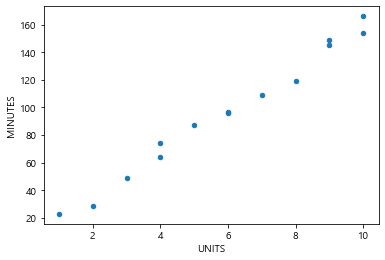

In [24]:
df_raw.plot.scatter(x = "UNITS", y = "MINUTES")

In [25]:
df_raw.corr(method = "pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [26]:
reg_model = smf.ols(formula = "MINUTES ~ UNITS", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Fri, 26 Feb 2021   Prob (F-statistic):           8.92e-13
Time:                        21:36:35   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

C:\Users\82105\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


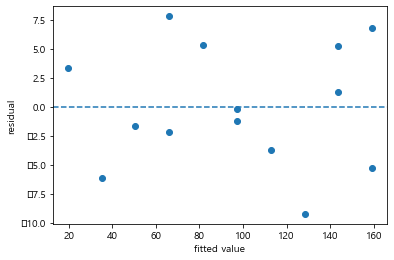

In [27]:
# 잔차의 등분산성: X-예측값, Y-잔차 
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

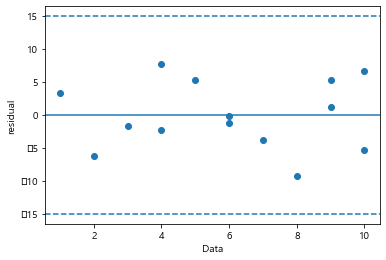

In [28]:
# 잔차의 독립성
plt.scatter(df_raw["UNITS"], reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "--")

C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


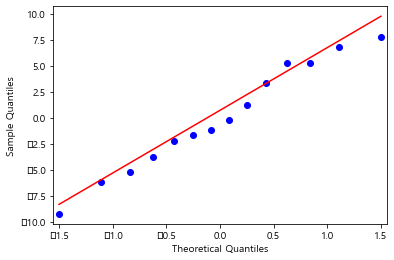

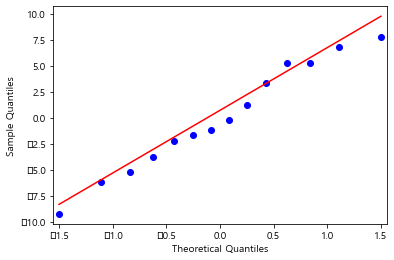

In [29]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line, 
#  r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

In [30]:
# 정규성 검정
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

C:\Users\82105\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=0.746448218273468, pvalue=0.6885109139659057)

> 최종 회귀식 : y_hat=4.1617 + 15.5088 * Units  
> => 부품 수가 1단위 증가할 때마다 수리 시간은 15.5분 증가

> Q : 부품의 수가 12개 일 때 예상 수리시간은?  
> A : y_hat=4.1617 + 15.5088 * 12 = 190.263 Minutes

### 18.
초코칩의 강도와 굽는 시간과의 인과관계를 분석하기 위한 회귀분석 실시와 회귀식 도출

In [31]:
df_raw = pd.DataFrame({"Strength": [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5],
                      "Baking_time" : [0.798922, 0.84902, 0.816163, 0.758266, 0.815894, 0.807477, 0.809068, 0.7664, 0.742243, 0.751118, 0.740629, 0.751495, 0.738863, 0.827428, 0.818172, 0.740939, 0.757128, 0.804695, 0.695121, 0.735377]})
df_raw.head()

,Strength,Baking_time
0,37.6,0.798922
1,38.6,0.849020
2,37.2,0.816163
3,36.4,0.758266
4,38.6,0.815894


In [32]:
df_raw.describe().round(3)

,Strength,Baking_time
count,20.000,20.000
mean,36.965,0.776
std,1.565,0.041
min,33.000,0.695
25%,36.375,0.742
50%,37.150,0.762
75%,37.725,0.811
max,39.000,0.849


<AxesSubplot:xlabel='Baking_time', ylabel='Strength'>

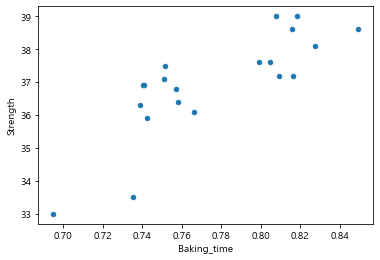

In [33]:
df_raw.plot.scatter(x = "Baking_time", y = "Strength")

In [34]:
df_raw.corr(method = "pearson").round(3)

,Strength,Baking_time
Strength,1.000,0.804
Baking_time,0.804,1.000


In [35]:
reg_model = smf.ols(formula = "Baking_time ~ Strength", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:            Baking_time   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Fri, 26 Feb 2021   Prob (F-statistic):           1.95e-05
Time:                        21:36:36   Log-Likelihood:                 46.530
No. Observations:                  20   AIC:                            -89.06
Df Residuals:                      18   BIC:                            -87.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0023      0.135      0.017      0.9

C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


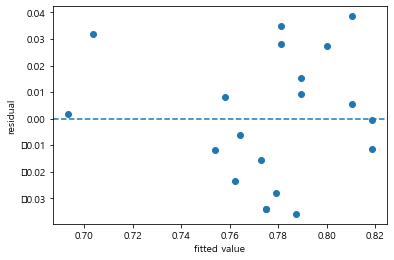

In [36]:
# 잔차의 등분산성: X-예측값, Y-잔차 
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

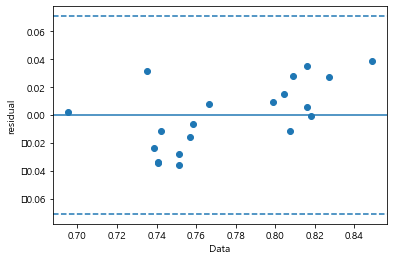

In [37]:
# 잔차의 독립성
plt.scatter(df_raw["Baking_time"], reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "--")

C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


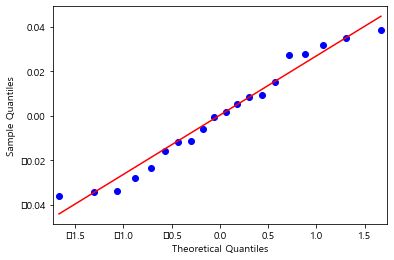

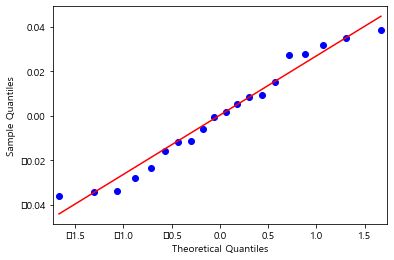

In [38]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line, 
#  r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

In [39]:
# 정규성 검정
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

NormaltestResult(statistic=2.651301770772148, pvalue=0.2656300081190157)